In [4]:
import numpy as np
import pandas as pd
import seaborn  as sns
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('/content/Tumor_Database.csv')
df.head()

,id,diagnosis,radius_mean
0,842302,M,17.99
1,842517,M,20.57
2,84300903,M,19.69
3,84348301,M,11.42
4,84358402,M,20.29


In [6]:
df.isnull().sum()

id             0
diagnosis      0
radius_mean    0
dtype: int64

In [7]:
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           569 non-null    int64  
 1   diagnosis    569 non-null    object 
 2   radius_mean  569 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 13.5+ KB


In [9]:
X = df.loc[:,['radius_mean']]
X

,radius_mean
0,17.99
1,20.57
2,19.69
3,11.42
4,20.29
...,...
564,21.56
565,20.13
566,16.60
567,20.60


In [10]:
y = df.loc[:,['diagnosis']]
y


,diagnosis
0,M
1,M
2,M
3,M
4,M
...,...
564,M
565,M
566,M
567,M


In [11]:
from sklearn.preprocessing import LabelEncoder

In [12]:
my_le = LabelEncoder()
my_le.fit(y)
y = my_le.transform(y)

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


In [13]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,

In [14]:
df["scaled_y"] = pd.DataFrame(y)
df.head()

,id,diagnosis,radius_mean,scaled_y
0,842302,M,17.99,1
1,842517,M,20.57,1
2,84300903,M,19.69,1
3,84348301,M,11.42,1
4,84358402,M,20.29,1


In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [16]:
from pandas.core.common import random_state
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,
                                               random_state=23)

In [17]:
my_log_reg = LogisticRegression()
my_log_reg.fit(X_train , y_train)

LogisticRegression()

In [18]:
y_pred_test = my_log_reg.predict(X_test)
y_pred_train = my_log_reg.predict(X_train)

In [19]:
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix
cm_matrix = confusion_matrix(y_train,y_pred_train)
cm_matrix


array([[261,  21],
       [ 41, 132]])

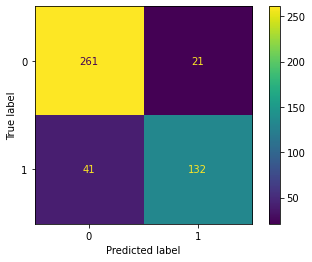

In [20]:
my_display = ConfusionMatrixDisplay(confusion_matrix=cm_matrix,
                                    display_labels=my_log_reg.classes_)
my_display.plot()

In [21]:
tn,fp,fn,tp = confusion_matrix(y_train,y_pred_train).ravel()

In [22]:
recall = tp/(tp+fn)
recall

0.7630057803468208

In [23]:
precision = tp/(tp+fp)
precision

0.8627450980392157

In [24]:
f1_score = 2*recall*precision / (recall+precision)
f1_score

0.8098159509202454

In [25]:
accuracy = (tp+tn) /(tp+tn+fp+fn)
accuracy

0.8637362637362638

In [26]:
tn,fp,fn,tp = confusion_matrix(y_test,y_pred_test).ravel()

In [27]:
recall = tp/(tp+fn)
recall

0.8974358974358975

In [28]:
precision = tp/(tp+fp)
precision

0.8974358974358975

In [29]:
f1_score = 2*recall*precision / (recall+precision)
f1_score

0.8974358974358975

In [30]:
accuracy = (tp+tn) /(tp+tn+fp+fn)
accuracy

0.9298245614035088

In [31]:
my_log_reg = LogisticRegression()
my_log_reg.fit(X_test , y_test)

LogisticRegression()

In [34]:
y_pred_test = my_log_reg.predict(X_test)

In [35]:
from sklearn.metrics import accuracy_score
acc_sc = accuracy_score(y_test,y_pred_test)
acc_sc

0.9210526315789473